In [20]:
### IMDB Top 1000 Movies Preprocessing & Clustering 

## 1. Data Preprocessing

### 1.1 Data Quality Issues

We will first download the dataset using Pandas read_csv() function and display its first 5 data points. We will drop the Poster_Link column as it is not very useful for our tasks.

**<font color="red">Code:</font>**

In [21]:
import pandas as pd
data =  pd.read_csv('../data/imdb_top_1000.csv', header = 1)
data.columns = ['Poster_Link', 'Series_Title' ,'Released_Year', 'Certificate' ,'Runtime'
                ,'Genre' ,'IMDB_Rating' ,'Overview' ,'Meta_score','Director'
                ,'Star1', 'Star2','Star3','Star4','No_of_Votes', 'Gross' ]

data = data.drop(['Poster_Link'],axis=1)
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
data.head()

Number of instances = 999
Number of attributes = 15


,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


### 1.2 Missing Values

Our first task is to convert the missing values to NaNs. We can then count the number of missing values in each column of the data.

**<font color="red">Code:</font>**

In [22]:
import numpy as np

data = data.replace('?', np.NaN)

print('Number of instances = %d' % data.shape[0])
print('Number of attributes = %d' % data.shape[1])

print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col, data[col].isna().sum()))

Number of instances = 999
Number of attributes = 15
Number of missing values:
	Series_Title: 0
	Released_Year: 0
	Certificate: 101
	Runtime: 0
	Genre: 0
	IMDB_Rating: 0
	Overview: 0
	Meta_score: 157
	Director: 0
	Star1: 0
	Star2: 0
	Star3: 0
	Star4: 0
	No_of_Votes: 0
	Gross: 169


We see that the 'Certificate', 'Meta_score', 'Gross' columns contain missing values. In the following example, the missing values in the 'Meta_score' column are replaced by the median value of that column. The values before and after replacement are shown for a subset of the data points from 54 to 58.

**<font color="red">Code:</font>**

In [23]:
data2 = data['Meta_score']

print('Before replacing missing values:')
print(data2[54:59])

data2 = data2.fillna(data2.median())

print('\nAfter replacing missing values:')
print(data2[54:59])

Before replacing missing values:
54     NaN
55    79.0
56     NaN
57    87.0
58    78.0
Name: Meta_score, dtype: float64

After replacing missing values:
54    79.0
55    79.0
56    79.0
57    87.0
58    78.0
Name: Meta_score, dtype: float64


We also try applying the dropna() function to the data frame.

**<font color="red">Code:</font>**

In [24]:
print('Number of rows in original data = %d' % (data.shape[0]))

data = data.dropna()

print('Number of rows after discarding missing values = %d' % (data.shape[0]))

Number of rows in original data = 999
Number of rows after discarding missing values = 713


### 1.3 Duplicate Data

**<font color="red">Code:</font>**

We first check for duplicate instances in the movies dataset. We can see that there are no duplicates.

In [25]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))


Number of duplicate rows = 0


### 1.4 Format some data

**<font color="red">Code:</font>**

We can see that the Gross column has commas and is treated as a string. Let's remove commas from the 'Gross' column and make it a float value.

In [26]:
data['Gross'] = data['Gross'].replace({',': ''}, regex=True)

data['Gross'] = pd.to_numeric(data['Gross'], errors='coerce')  # 'coerce' will turn invalid parsing to NaN

### 1.5 Aggregation

In order to get to know the data better, the code below will compute the average rating for each genre set.

**<font color="red">Code:</font>**

In [27]:
average_rating_by_genre = data.groupby('Genre')['IMDB_Rating'].mean()
print(average_rating_by_genre)


Genre
Action, Adventure             8.180000
Action, Adventure, Comedy     7.828571
Action, Adventure, Drama      8.225000
Action, Adventure, Family     7.600000
Action, Adventure, Fantasy    8.200000
                                ...   
Horror, Thriller              7.700000
Mystery, Romance, Thriller    8.300000
Mystery, Sci-Fi, Thriller     7.800000
Mystery, Thriller             8.150000
Western                       8.350000
Name: IMDB_Rating, Length: 172, dtype: float64


Here we will check how many series were released in each year and after we will plot it.

**<font color="red">Code:</font>**

In [28]:
movies_per_year = data.groupby('Released_Year')['Series_Title'].count()
print(movies_per_year)

Released_Year
1930     1
1931     1
1933     1
1934     1
1936     1
        ..
2016    20
2017    18
2018    12
2019    15
PG       1
Name: Series_Title, Length: 83, dtype: int64


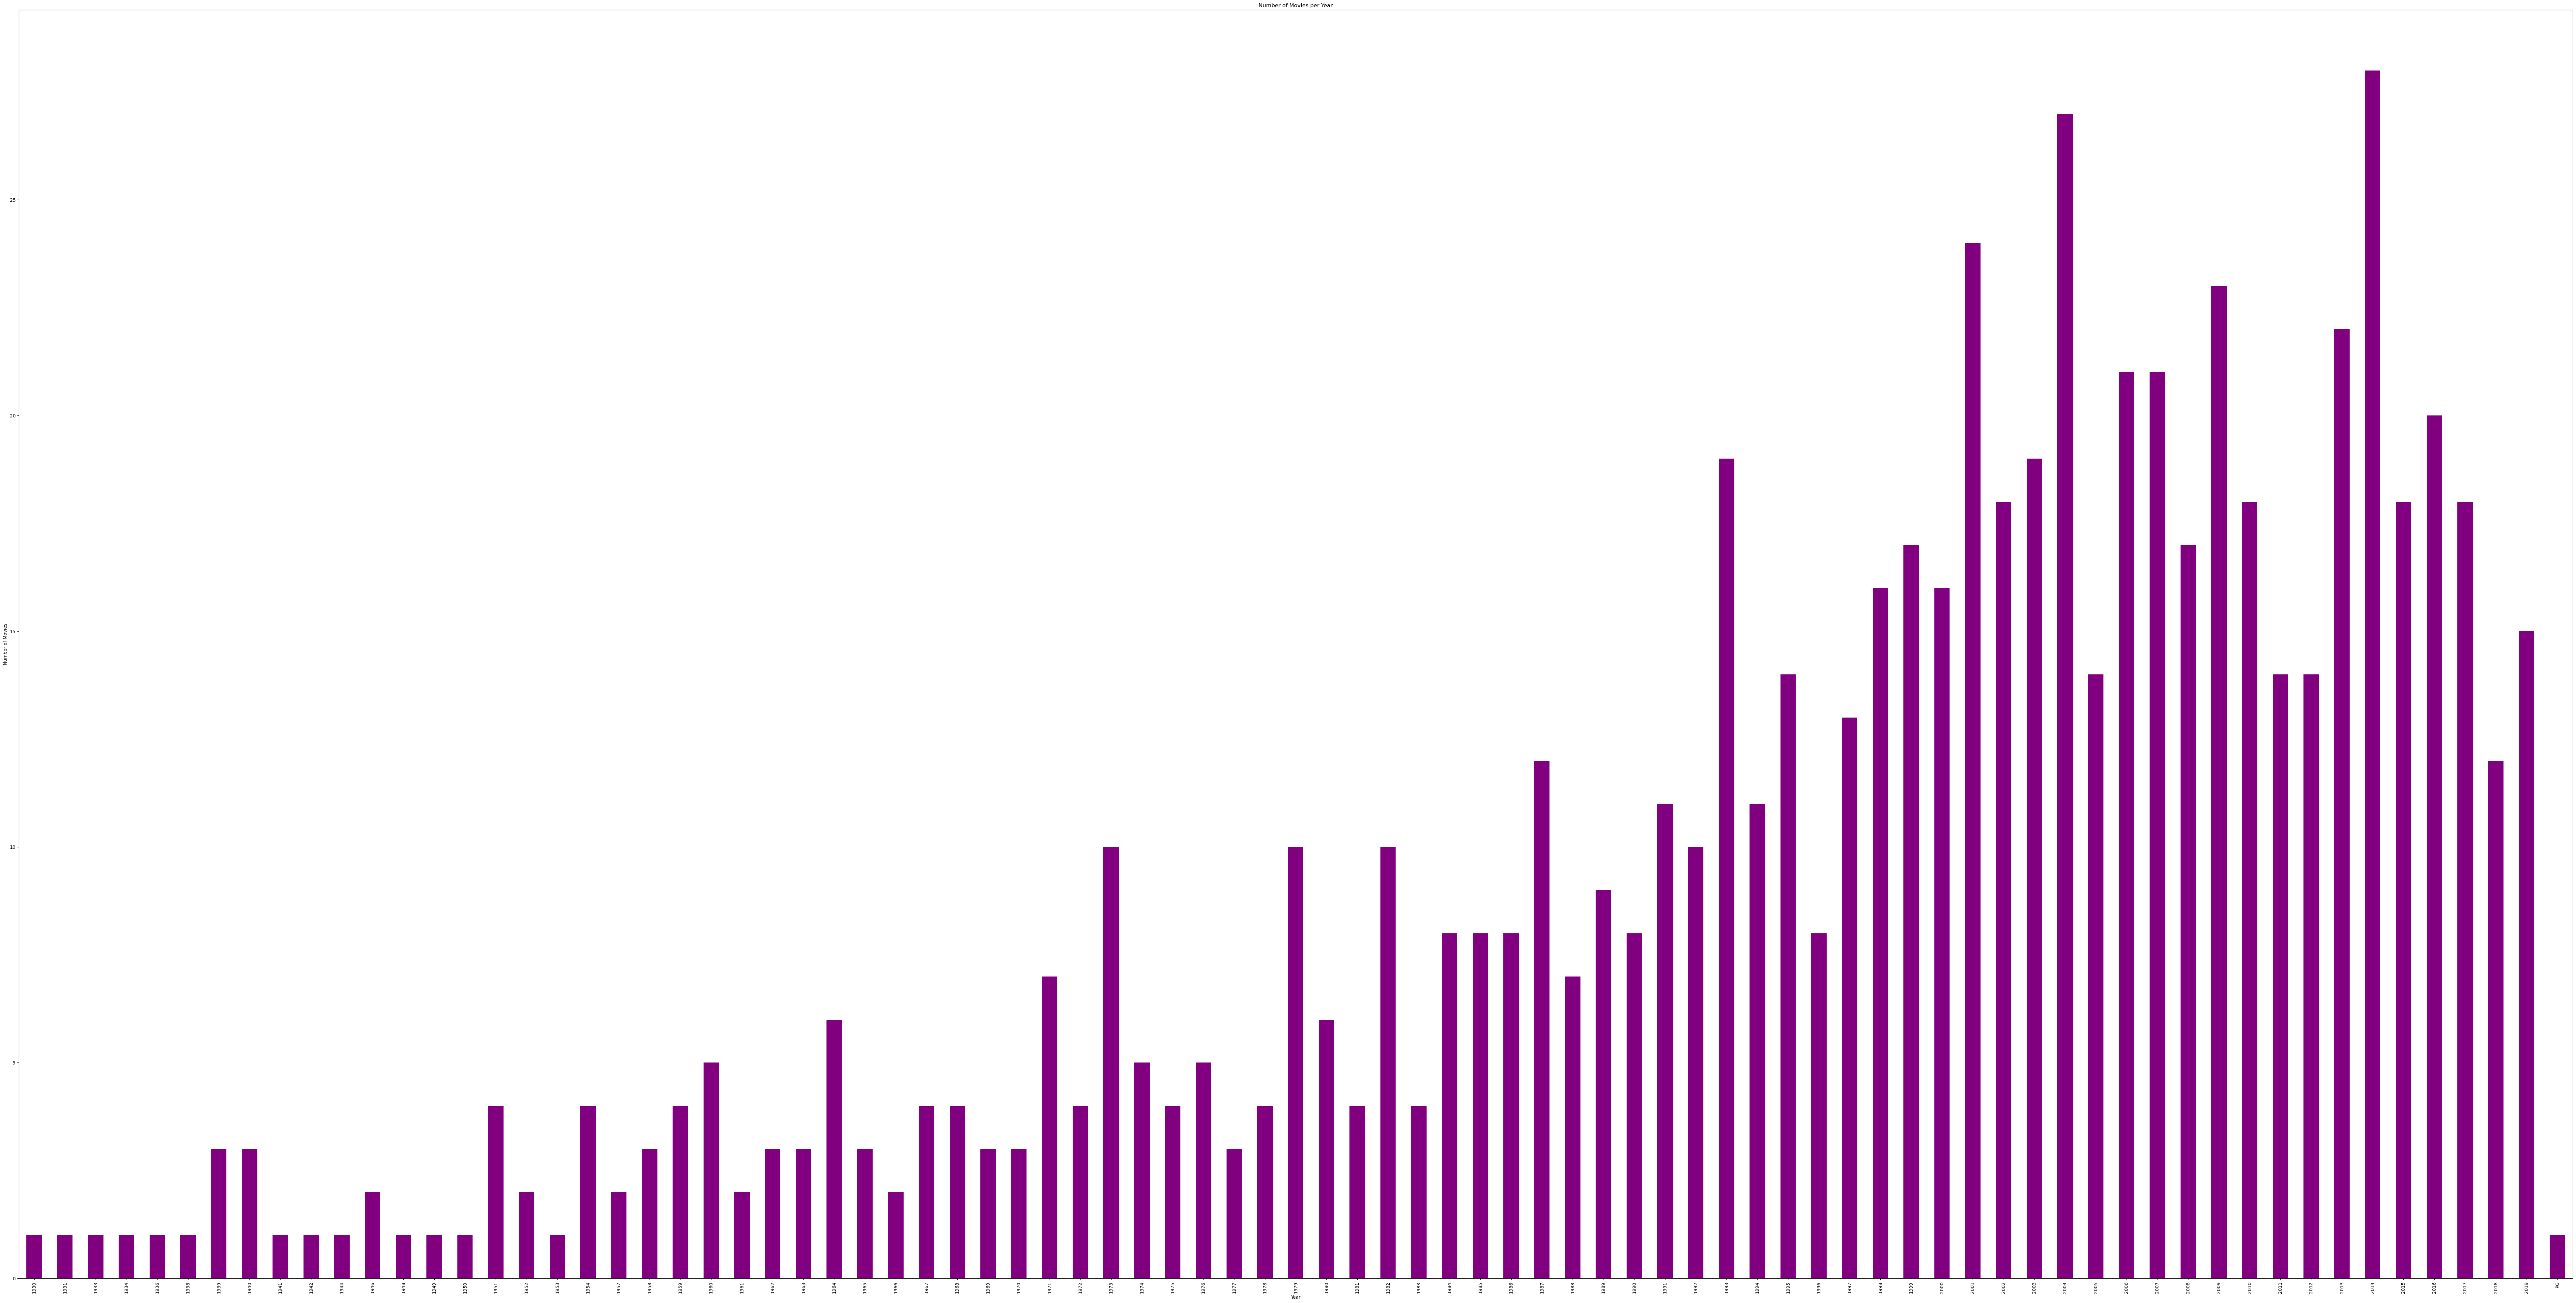

In [29]:
import matplotlib.pyplot as plt
movies_per_year = data.groupby('Released_Year')['Series_Title'].count()

plt.figure(figsize=(100, 50))
movies_per_year.plot(kind='bar', color='purple')
plt.title('Number of Movies per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')

plt.show()

## 2. Clustering

### 2.1 Using K-means

We imported the necessary libraries, including pandas for data manipulation, scikit-learn for the KMeans clustering algorithm, and matplotlib for visualization. We performed K-means clustering with the specified number of clusters (num_clusters). The KMeans class is used, and the resulting cluster labels are added to the DataFrame as a new column called 'cluster'. We visualized the clusters by creating a scatter plot. Each point represents a movie, and its position on the plot is determined by the Metascore and Gross Earnings. Movies belonging to different clusters are differentiated by color. The title, x-axis label, y-axis label, and legend are added to enhance the plot's readability.


**<font color="red">Code:</font>**


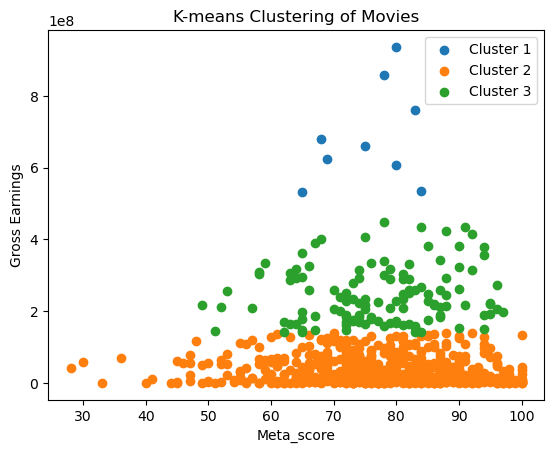

In [30]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the IMDb data
features = ['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']
data_numeric = data[features]

# Apply K-means clustering
num_clusters = 3 # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
data['cluster'] = kmeans.fit_predict(data_numeric)

# Visualize the clusters
for cluster in range(num_clusters):
    cluster_data = data[data['cluster'] == cluster]
    plt.scatter(cluster_data['Meta_score'], cluster_data['Gross'], label=f'Cluster {cluster + 1}')

plt.title('K-means Clustering of Movies')
plt.xlabel('Meta_score')
plt.ylabel('Gross Earnings')
plt.legend()
plt.show()



The choice of features significantly impacts the effectiveness of K-means clustering on IMDb movie data. If the selected features, such as "Gross Earnings" and "Metascore," do not adequately capture the underlying patterns in the dataset, the resulting clusters may lack meaningful distinctions. It's crucial to carefully choose features that are relevant to the clustering goal and experiment with different combinations. Additionally, normalizing or standardizing features, exploring the data distribution, considering the inherent complexity of the dataset, and experimenting with alternative clustering algorithms (e.g., DBSCAN or hierarchical clustering) can contribute to more accurate and interpretable results. To address these considerations, one can modify the feature selection, normalize the data, and experiment with different clustering algorithms and feature combinations.


After we tried to perform normalization. This code incorporates feature normalization using StandardScaler to ensure that all features are on a similar scale, which can enhance the performance of K-means clustering.

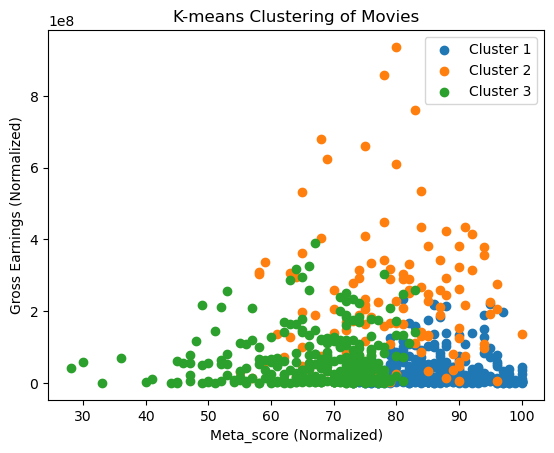

In [31]:
from sklearn.preprocessing import StandardScaler

features = ['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']
data_numeric = data[features]

scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_numeric)

num_clusters = 3  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
data['cluster'] = kmeans.fit_predict(data_normalized)

for cluster in range(num_clusters):
    cluster_data = data[data['cluster'] == cluster]
    plt.scatter(cluster_data['Meta_score'], cluster_data['Gross'], label=f'Cluster {cluster + 1}')

plt.title('K-means Clustering of Movies')
plt.xlabel('Meta_score (Normalized)')
plt.ylabel('Gross Earnings (Normalized)')
plt.legend()
plt.show()

### 2.1 Using DBScan

The code begins by standardizing the features using StandardScaler to ensure consistent scaling for the distance-based DBSCAN algorithm. DBSCAN is then applied with parameters 'eps' (maximum distance for points in the same neighborhood) set to 0.5 and 'min_samples' (minimum points to form a dense region) set to 5. Core samples, representing dense regions, are extracted, while outliers are labeled with -1. The clusters and core samples are visualized on a scatter plot, with each data point colored based on its cluster label, and core samples marked with red 'x' markers.

**<font color="red">Code:</font>**


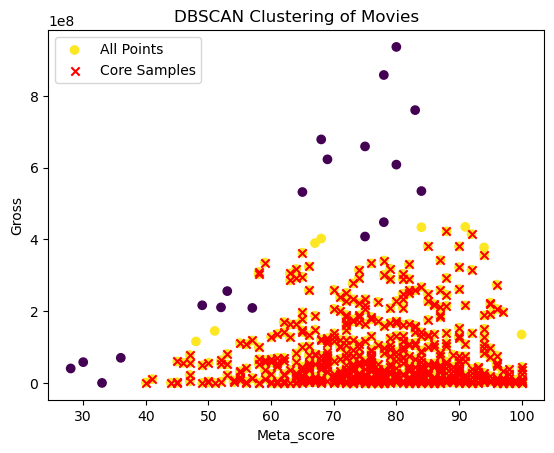

In [32]:
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your DataFrame
features = ['Meta_score', 'Gross']

# Use StandardScaler to scale the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['cluster_dbscan'] = dbscan.fit_predict(data_scaled)

# Extract core samples (ignore outliers with label -1)
core_samples_mask = dbscan.core_sample_indices_
core_samples = data.iloc[core_samples_mask]

# Visualize the clusters and core samples
plt.scatter(data['Meta_score'], data['Gross'], c=data['cluster_dbscan'], cmap='viridis', label='All Points')
plt.scatter(core_samples['Meta_score'], core_samples['Gross'], c='red', marker='x', label='Core Samples')
plt.title('DBSCAN Clustering of Movies')
plt.xlabel('Meta_score')
plt.ylabel('Gross')
plt.legend()
plt.show()




The eps parameter defines the maximum distance between two samples for one to be considered as in the neighborhood of the other. We reduced eps from 0.5 to 0.2, the algorithm becomes more sensitive to smaller distances, leading to better cluster separation

We changed the marker for all points from the default ('o') for better clarity in distinguishing individual data points.

These adjustments aim to enhance the sensitivity of DBSCAN to the local neighborhood structure of the data, leading to more meaningful clusters and a clearer visualization of the results.

**<font color="red">Code:</font>**


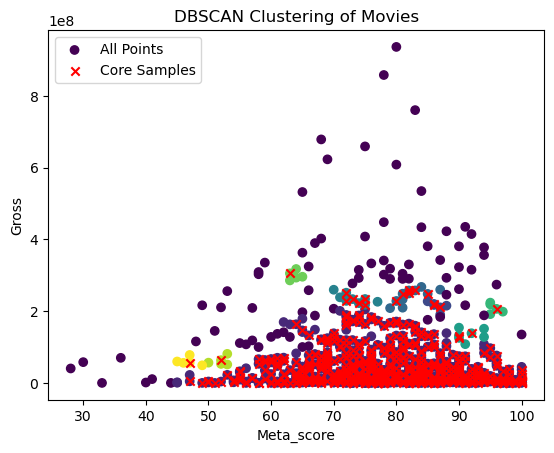

In [36]:
features = ['Meta_score', 'Gross']


scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

dbscan = DBSCAN(eps=0.2, min_samples=5)
data['cluster_dbscan'] = dbscan.fit_predict(data_scaled)


core_samples_mask = dbscan.core_sample_indices_
core_samples = data.iloc[core_samples_mask]

plt.scatter(data['Meta_score'], data['Gross'], c=data['cluster_dbscan'], cmap='viridis', marker='o', label='All Points')
plt.scatter(core_samples['Meta_score'], core_samples['Gross'], c='red', marker='x', label='Core Samples')
plt.title('DBSCAN Clustering of Movies')
plt.xlabel('Meta_score')
plt.ylabel('Gross')
plt.legend()
plt.show()


### 3.Conclusions and future improvements

To enhance our overall clustering project for the IMDb movies dataset, we should aim to refine the analysis by optimizing data preprocessing through techniques like normalizing or standardizing features. We should have experimented with various scaling methods to improve the performance of clustering algorithms. Other steps should involve fine-tuning the parameters of the chosen clustering algorithm, such as DBSCAN or K-Means, utilizing evaluation metrics and visualizations to facilitate a better interpretation of results. Additionally, we should explore different clustering techniques, handle outliers thoughtfully, and adopt an iterative approach to refine our strategy based on insights gained from previous clustering outcomes. 

This approach would ensure that our clustering solution aligns with the specific goals and characteristics of the IMDb movies dataset.
